# Ejercicio 2 Sentiment Analysis with politics
Ya se hizo la limpieza de datos inicial de este dataset en el notebook [Analisis Dataset 2](00_2_AnalisisDataset2.ipynb)

En este notebook haremos un Sentiment Analysis de los tweets de Obama y Trump.

In [1]:
import numpy as np
import pandas as pd
import os
import io
import matplotlib.pyplot as plt

# Permitir ver columnas completas
pd.set_option('display.max_colwidth', None)

In [2]:
# Función para cargar dataframe
def load_data(ruta, nombre):
    path = os.path.join(ruta, nombre)    
    return pd.read_csv(path, encoding="ISO-8859-1")

In [3]:
# Carga de datos
df = load_data('data', 'dataset_2_limpieza_inicial.csv')
df.head()

,president,tweet
0,OBAMA,low plastic stool cheap delicious noodles cold hanoi beer ill remember tony teach us food impoantly ability bring us together make us little less afraid unknown well miss
1,OBAMA,low plastic stool cheap delicious noodles cold hanoi beer ill remember tony teach us food impoantly ability bring us together make us little less afraid unknown well miss
2,OBAMA,national gun violence awareness day show commitment keep kid safe gun violence everyone weve lose take action change leadership laws reflect commitment matter long take
3,OBAMA,never truly debt owe fall heroes remember honor sacrifice live endure ideals justice equality oppounity generations americans give last full measure devotion
4,OBAMA,center leaders tomorrow ready step build world michelle grateful chicago city council make happen


# Visualización palabras más usadas
Visualizamos las palabras más usadas de cada presidente para hacernos una idea inicial.

In [4]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

class wordcloud():
    def wordclouddraw(self,df_pandas,sent):
        if sent == 'obama':
            text_filtered_sentiment = df_pandas['president'] == 'OBAMA'
            text_filtered_sentiment2 = df_pandas[text_filtered_sentiment]
            text = text_filtered_sentiment2.tweet.to_string(index=False, header=False)
            filename = "/Obama_tweets.png"
        elif sent == 'trump':
            text_filtered_sentiment = df_pandas['president'] == 'TRUMP'
            text_filtered_sentiment2 = df_pandas[text_filtered_sentiment]
            text = text_filtered_sentiment2.tweet.to_string(index=False, header=False)
            filename = "/Trump_tweets.png"
        else:
            # Mostrar ambos
            text = df_pandas.tweet.to_string( index=False, header=False)
            filename = "/Trump_Obama_tweets.png"

        file = os.getcwd()

        wordcloud = WordCloud(
            width = 1500,
            height = 1000,
            background_color = 'black',
            stopwords=['haze']
        ).generate(text)

        fig = plt.figure(
            figsize = (20, 10),
            facecolor = 'k',
            edgecolor = 'k')
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.tight_layout(pad=0)

        wcpath=file+filename

        wordcloud.to_file(wcpath)

In [5]:
from sklearn.feature_extraction.text import (
    CountVectorizer)

import collections
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

In [6]:
class wordfreq():
    def vectorization(self, df_pandas, sent2):
        countv = CountVectorizer()
        bow = countv.fit_transform(df_pandas.tweet)
        word_freq = dict(zip(countv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
        word_counter = collections.Counter(word_freq)
        word_counter_df = pd.DataFrame(word_counter.most_common(30), columns=['word', 'freq'])

        file = os.getcwd()
        title = "Word Frequency for %s tweets" % sent2
        fig, ax = plt.subplots(figsize=(10, 12))
        sns.barplot(x="freq", y="word", data=word_counter_df, palette="PuBuGn_d", ax=ax)

        plt.xticks(
            rotation=90,
            horizontalalignment='right',
            fontweight='light',
            size = 14
        )

        plt.xlabel("Frequency", size=14);
        plt.ylabel("30 more frequent words", size=14);

        plt.title(title, size=18)
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);

        filename = "/graph_%s_.png" %sent2
        graphpath = file + filename
        plt.savefig(graphpath, format="png")

## Obama

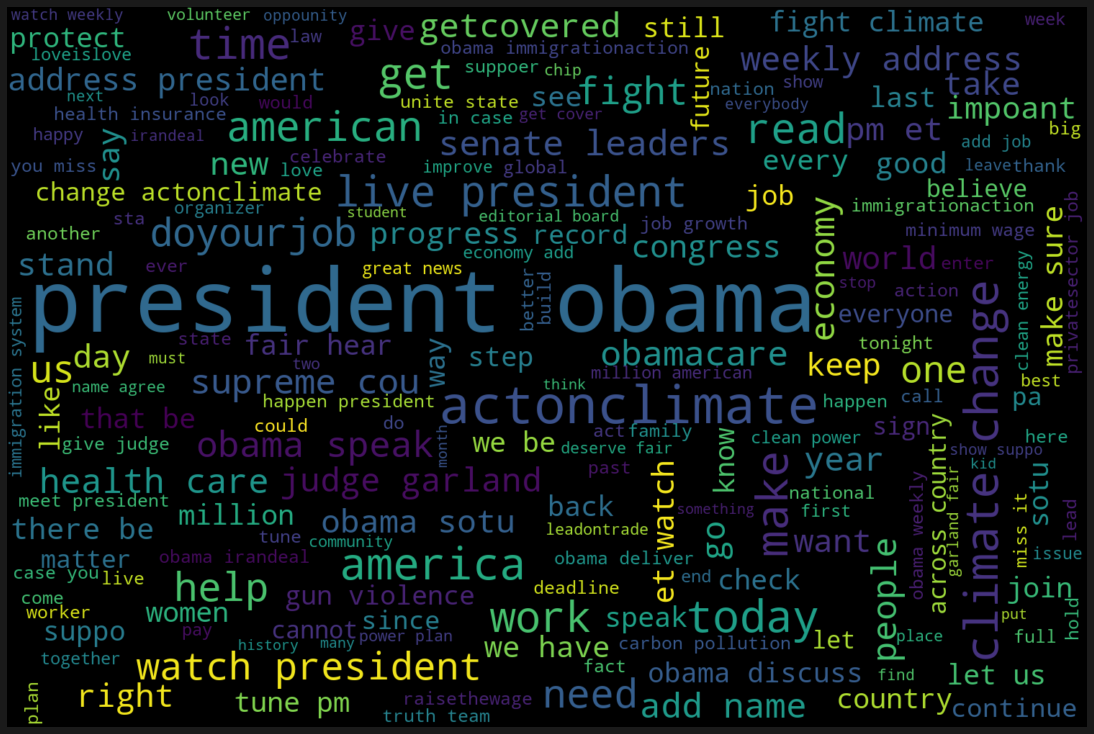

In [7]:
genwordcloud = wordcloud()
genwordcloud.wordclouddraw(df, sent="obama")

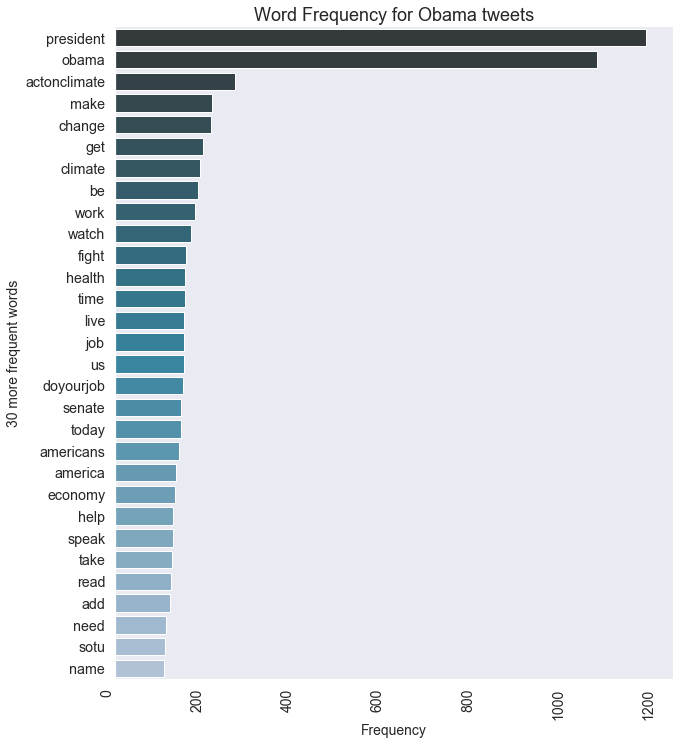

In [8]:
wf = wordfreq()
wf.vectorization(df[df['president'] == 'OBAMA'], sent2="Obama")

## Trump

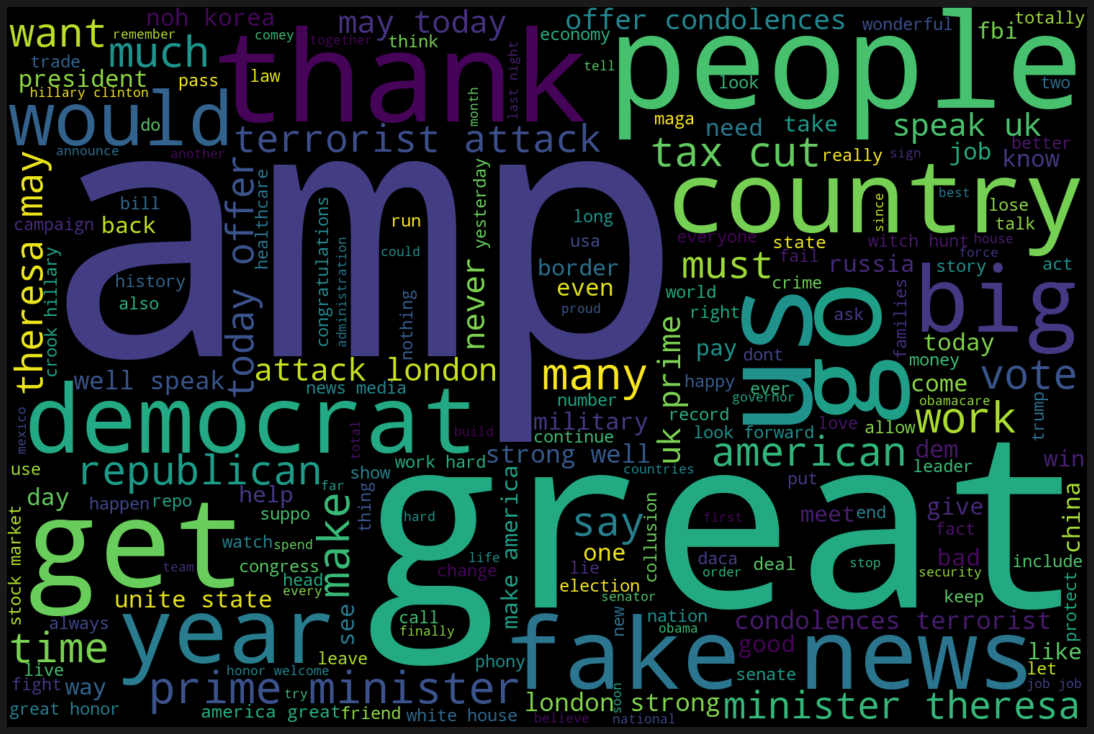

In [9]:
genwordcloud.wordclouddraw(df, sent="trump")

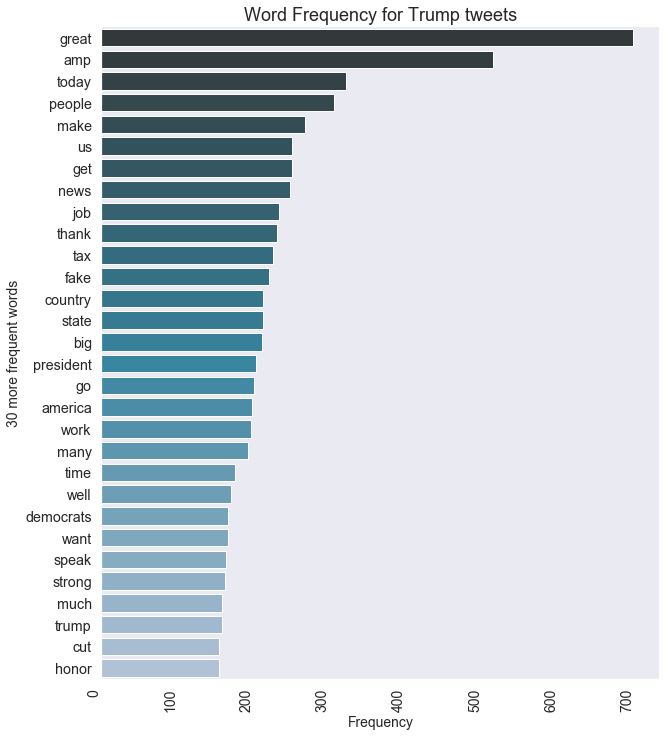

In [10]:
wf.vectorization(df[df['president'] == 'TRUMP'], sent2="Trump")

Como se puede ver tanto en los gráficos de frecuencia como en las nubes de etiquetas, Obama habla más de él y su familia en Twitter mientras que Trump habla del país, acontecimientos, trabajo etc. También parece que a Obama le interesa más el cambio climático.

# LDA (Latent Dirichlet Allocation)
Pasamos ahora al análisis de verdad usando el algoritmo LDA. Este algoritmo genera resultados pero no categoriza.

In [15]:
import gensim
import spacy
from string import punctuation
import re
import pyLDAvis.gensim
import io
from stop_words import get_stop_words
import warnings
warnings.filterwarnings('ignore')

## Preparar dataset en una lista de documentos y tokenizar

In [13]:
!python -m spacy download en_core_web_sm

import en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [59]:
nlp = en_core_web_sm.load()
stop_words = get_stop_words('en') + list(punctuation) + [' ']

documents = []

for row in df.iterrows():
    #_, info = row    
    #q, a = info
    
    #q = re.sub(r'\n', '', q)
    #a = re.sub(r'\n', '', a)

    #q = [t.text for t in nlp(q.rstrip(), disable=['parser', 'tagger', 'ner']) if t.text not in stop_words]
    #a = [t.text for t in nlp(a.rstrip(), disable=['parser', 'tagger', 'ner']) if t.text not in stop_words]
    
    #documents.append(q)
    #documents.append(a)
    a = row[1][1]
    a = re.sub(r'\n', '', a)
    a = [t.text for t in nlp(a.rstrip(), disable=['parser', 'tagger', 'ner']) if t.text not in stop_words]
    documents.append(a)

In [60]:
vocab = set([t for doc in documents for t in doc])

w2id = {k:i for i, k in enumerate(vocab)}
id2w = {i:k for k, i in w2id.items()}

'unike tokens {}'.format(len(w2id))

'unike tokens 3683'

In [61]:
from gensim.corpora import Dictionary

In [62]:
gensim_dict = Dictionary(documents)
len(gensim_dict)

3683

In [63]:
# Colección de documentos back of words
corpus = [gensim_dict.doc2bow(doc) for doc in documents]

## LDA

In [64]:
from gensim import corpora, models, similarities
from math import exp

In [65]:
# Buscamos 50 temas
k = 50
lda_model = models.LdaModel(corpus, id2word=gensim_dict, num_topics=k, iterations=5, passes=20, alpha='auto')

In [66]:
lda_model.show_topics()

[(2,
  '0.154*"justice" + 0.107*"illegal" + 0.066*"mean" + 0.052*"race" + 0.050*"wait" + 0.050*"fully" + 0.045*"thousands" + 0.041*"criminal" + 0.039*"immigrants" + 0.028*"impoance"'),
 (0,
  '0.141*"law" + 0.093*"thing" + 0.077*"fire" + 0.062*"enforcement" + 0.045*"think" + 0.044*"expand" + 0.043*"access" + 0.037*"manufacture" + 0.025*"woman" + 0.025*"return"'),
 (43,
  '0.127*"really" + 0.096*"things" + 0.060*"great" + 0.051*"morning" + 0.037*"leadership" + 0.035*"water" + 0.035*"organize" + 0.033*"guy" + 0.033*"benefit" + 0.032*"freedom"'),
 (4,
  '0.068*"life" + 0.065*"prayers" + 0.063*"s" + 0.062*"business" + 0.058*"thoughts" + 0.051*"young" + 0.047*"promise" + 0.044*"point" + 0.037*"family" + 0.037*"challenge"'),
 (17,
  '0.235*"democrats" + 0.107*"believe" + 0.067*"ready" + 0.050*"get" + 0.039*"pollution" + 0.038*"interest" + 0.033*"cut" + 0.032*"carbon" + 0.027*"terrorism" + 0.025*"time"'),
 (10,
  '0.145*"change" + 0.130*"actonclimate" + 0.115*"fight" + 0.098*"climate" + 0.070

## Visualización del modelo

In [67]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, gensim_dict)
pyLDAvis.display(vis)

Hay mucho solapamiento, vamos a seleccionar el mejor modelo de otra forma y volveremos a mostrar los clústers

## Selección del mejor modelo

In [68]:
from tqdm import tqdm

In [69]:
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, iterations=5, passes=20, alpha='auto')
        model_list.append(model)

        cm = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(cm.get_coherence())

    return model_list, coherence_values

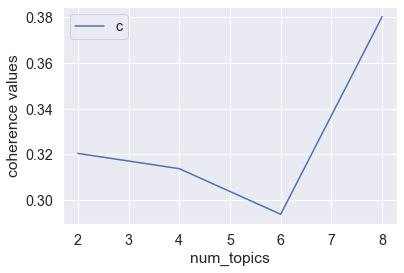

In [70]:
limit=10; start=2; step=2;
model_list, coherence_values = compute_coherence_values(gensim_dict, corpus, documents, limit, start, step)

x = range(start, limit, step)

plt.plot(x, coherence_values)
plt.xlabel('num_topics')
plt.ylabel('coherence values')
plt.legend(('coherence_values'), loc='best')
plt.show()

Según el gráfico, lo ideal sería probar con 8 topics

In [72]:
k = 8
lda_model = models.LdaModel(corpus, id2word=gensim_dict, num_topics=k, iterations=5, passes=20, alpha='auto')

vis = pyLDAvis.gensim.prepare(lda_model, corpus, gensim_dict)
pyLDAvis.display(vis)

# Resultados
- El topic 1 parece que habla de lo bueno que sería el recorte de impuestos para la gente
- El topic 2 habla de la presicencia de obama, del trabajo para los americanos, de la economía, de la inmigración etc
- El topic 3 da las gracias por el trabajo en las elecciones en las que los demócratas ganan a los republicanos
- El topic 4 habla fake news, de Rusia, de la campaña de Trump, de los problemas con Hilary Clinton
- El topic 5 de salud de los americanos, de estar asegurado por el Obama Care. En resumen, de ayudas, la cobertura del obama care etc
- El topic 6 habla del senado, de escoger líderes para el país, de escuchar
- El topic 7 habla de la lucha por el cambio climático, energía etc
- El topic 8 parece que habla del atentado terrorista en Londres, son tweets mostrando condolencias, sobre theresa may etc